$13^{th}$ Aug 2021

In [1]:
import pandas as pd
import os, glob, math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from ipywidgets import widgets, interactive
from scipy.interpolate import interp1d, make_interp_spline

In [2]:
dt = datetime.today().strftime(format='%d-%m-%Y')

In [3]:
category = ''
ext = 'svg'

### **Variables**

In [4]:
#uniqueness in directory and file names is assumed for all analyses
sars_dir = 'SARS-CoV-2'
run_dir = 'KnowledgeBrief'
home_dir = os.getenv('HOME')
parent_dir = glob.glob(f'{home_dir}/**/{sars_dir}', recursive=True)[0]

In [5]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    elif x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    elif x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    elif x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    elif 'AY' in str(x):
        return str(x).replace(str(x), str(x)+'(Delta)')
    elif x == 'B.1.1.529':
        return x.replace(x, 'B.1.1.529(Omicron)')
    elif 'BA' in str(x):
        return str(x).replace(str(x), str(x)+'(Omicron)')
    return x   

In [6]:
def assign_seq_platform(x):
    x = str(x)
    if 'ONT' in x: 
        return x.replace(x, 'MinION')
    elif '_NS' in x:
        return x.replace(x, 'NextSeq')
    return x.replace(x, 'MiSeq')

In [7]:
from pprint import pprint
# pprint(clrs)

In [8]:
clr_code = {'A': ('midnightblue', '#191970'),
 'A.23': ('lime', '#00FF00'),
 'A.23.1': ('gray', '#808080'),
 'A.25': ('orangered', '#FF4500'),
 'AY.16(Delta)': ('saddlebrown', '#8B4513'),
 'AY.24(Delta)': ('teal', '#008080'),
 'AY.26(Delta)': ('black', '#000000'),
 'AY.33(Delta)': ('seagreen', '#2E8B57'),
 'AY.34(Delta)': ('steelblue', '#4682B4'),
 'AY.37(Delta)': ('yellowgreen', '#9ACD32'),
 'AY.4(Delta)': ('mediumvioletred', '#C71585'),
 'AY.7.1(Delta)': ('darkgreen', '#7FFFD4'),
 'B.1': ('cyan', '#00FFFF'),
 'B.1.1': ('chocolate', '#D2691E'),
 'B.1.1.1': ('wheat', '#F5DEB3'),
 'B.1.1.318': ('slategray', '#708090'),
 'B.1.1.7(Alpha)': ('orange', '#FFA500'),
 'B.1.143': ('olive', '#808000'),
 'B.1.153': ('taffy', '#F96DDA'),
 'B.1.160': ('honeydew', '#FFD700'),
 'B.1.214': ('gold', '#8FBC8F'),
 'B.1.276': ('aquamarine', '#006400'),
 'B.1.324': ('magenta', '#FF00FF'),
 'B.1.336': ('tan', '#D2B48C'),
 'B.1.340': ('darkslateblue', '#483D8B'),
 'B.1.343': ('indigo', '#4B0082'),
 'B.1.349': ('royal', '#7852A9'),
 'B.1.351(Beta)': ('blue', '#0000FF'),
 'B.1.390': ('darkkhaki', '#BDB76B'),
 'B.1.391': ('darkseagreen', '#F0FFF0'),
 'B.1.393': ('sapphire', '#0F52BA'),
 'B.1.396': ('dodgerblue', '#1E90FF'),
 'B.1.432': ('cornflowerblue', '#FFF5EE'),
 'B.1.434': ('palevioletred', '#DB7093'),
 'B.1.517': ('seashell', '#FFFAF0'),
 'B.1.525(Eta)': ('green', '#008000'),
 'B.1.530': ('red', '#AFEEEE'),
 'B.1.541': ('cornflowerblue', '#6495ED'),
 'B.1.549': ('brown', '#A52A2A'),
 'B.1.579': ('khaki', '#F0E68C'),
 'B.1.596.1': ('magenta', '#FF00FF'),
 'B.1.609': ('sienna', '#A0522D'),
 'B.1.617.2(Delta)': ('paleturquoise', '#FF0000'),
 'B.1.617.2*(Delta)': ('yellow', '#FFFF00'),
 'B.1.635': ('mediumpurple', '#9370DB'),
 'Q.8': ('darkgray', '#A9A9A9'),
 'None': ('pink', '#FFC0CB'),
 'B.1.540': ('maya', '#73C2FB'),
 'B.1.596': ('purple', '#800080'),
 'B.1.574': ('chocolate', '#D2691E'),
 'B.1.1.519': ('black', 'k'),
 'B.1.577': ('silver', '#C0C0C0'),
 'B.1.1.526': ('rosybrown', '#BC8F8F'),
 'Unknown': ('goldenrod', '#DAA520')}
avail_clr = []#, 'TBA7', 'TBA6', 'TBA5', 'TBA4', 'TBA3', 'TBA2', 'TBA1'

In [9]:
# pprint(clr_code)

In [10]:
title_fontdict = {'fontsize': 12,
        'fontweight': 'normal',
        'color': 'k',
        'horizontalalignment': 'center'}

In [11]:
# set(clr_code.keys()) - set(df_seq_summ_who.LIN.value_counts().index)

In [12]:
# set(df_seq_summ_who.LIN.value_counts().index) - set(clr_code.keys())

In [13]:
df_metadata = pd.read_excel(glob.glob(f'{parent_dir}/**/Outputs/COVID19-resultsCts-merged-cln.xlsx', recursive=True)[0])#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [14]:
df_covs = df_metadata#[df_metadata['S_NUM'].str.contains('COVC') == True]#.shape

In [15]:
#use a cut-off; per month; plot a pie; 
# df_covs['COUNT_RES'].value_counts()#.plot.pie()

In [16]:
#use a cut-off; per month; plot a pie; 
df_covs[df_covs['COUNT_RES'] == 'Kajido']#.value_counts()#.plot.pie()

,S_NUM,CASE_ID,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,...,SAMP_TYPE,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF,VACC_STATUS,VACC_DOS,Well_Position,AVG_Ct,Dt_Run


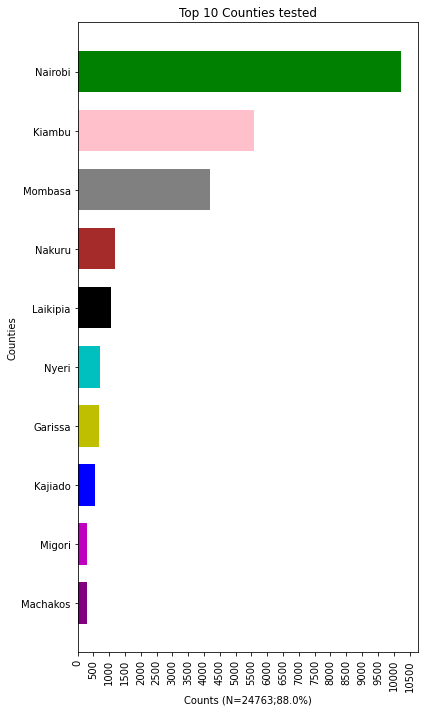

In [17]:
width = df_covs[df_covs['S_NUM'].str.contains('COV')]['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

max_count = max(width)
# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
# n = len(lins) - 2
m = sum(width)
n = df_covs.shape[0]
xticks = np.arange(0, (math.ceil(max_count / 500) + 1) * 500, 500)
fig, ax =plt.subplots(figsize=(6,10))
# ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, color=['purple', 'm', 'b',
                                                'y', 'c', 'k',
                                                'brown', 'gray',
                                               'pink', 'g'])#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
# plt.grid(which='major', axis='x', ls='--', color='lightgray')
plt.ylabel('Counties')
plt.yticks(fontsize=10)
plt.xlabel(f'Counts (N={m};{round(m/n*100, 1)}%)')
plt.title('Top 10 Counties tested', title_fontdict)
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-top10tested_{dt}.{ext}")
plt.show()

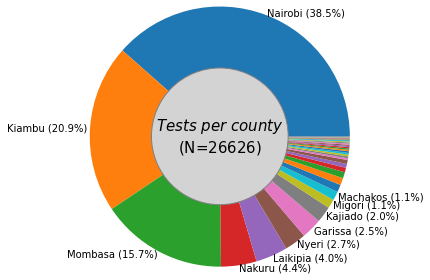

In [18]:
fig,ax = plt.subplots()

data = df_covs[df_covs['S_NUM'].str.contains('COV')]['COUNT_RES'].value_counts()
# pie_clr = {clr_code[k][1]: k for k in data.index}
pct = (np.array(data)/np.array(data).sum()*100).round(1)
labels = {}
under1 = []
for k,v in zip(data.index, pct):
    if v >= 1:
        labels[k] = f'{k} ({v}%)'
    else:
        under1.append(k)
        labels[k] = ''
plt.pie(data, wedgeprops=dict(width=1), labels=list(labels.values()), labeldistance=1.02, radius=1.5)#, 
#        colors=pie_clr)
t = ax.text(
    0, 0, f'$Tests$ $per$ $county$\n(N=${data.sum()}$)', ha="center", va="center", size=15,
    bbox=dict(boxstyle="circle,pad=0.3", fc="lightgray", ec="gray", lw=1))
# t2 = ax.text(
#     3, 0, f"{f'{new_line}'.join(under1)}", ha='center', va='center',
#     bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="gray", lw=1))
# ax.annotate(f'Distribution of lineages\nN={data.sum()}\n(coverage >= 70%)', (0,0), fontsize=14)
# ax.set_title('Proportions for Test Outcome', title_fontdict, pad=1.1)
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-testfreq-pie{category+'_'}{dt}.{ext}")
plt.show()

### **Confirm updated MS file**

In [19]:
df_seq_summ = pd.read_excel(glob.glob(f'{parent_dir}/**/metadata-seq-MS-ILL-ONT_uptoseq32_18-01-2022.xlsx', recursive=True)[0])#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [21]:
mask1 = df_seq_summ['S_NUM'].str.contains('DRC') == False

In [22]:
df_seq_summ_ke = df_seq_summ[mask1 == True]

In [23]:
mask2 = df_seq_summ_ke['DT_SAM_COLL'] >= pd.to_datetime('2021-01-01 00:00:00')
mask3 = df_seq_summ['CASE_ID'].str.contains('DRC') == False

In [24]:
df_seq_summ2021 = df_seq_summ_ke[mask2]

In [25]:
df_seq_summ_drc = df_seq_summ[mask1 == False]

In [26]:
df_seq_summ_delta = df_seq_summ_ke.assign(LIN=df_seq_summ_ke.LIN.replace('B.1.617.2', 'B.1.617.2*(Delta)').
                                       apply(lambda x: str(x).replace(str(x), 'B.1.617.2*(Delta)') if 'AY' in str(x) else x))

In [27]:
df_seq_summ_delta21 = df_seq_summ_ke.assign(LIN=df_seq_summ_ke.LIN.replace('B.1.617.2', 'B.1.617.2*(Delta)').
                                       apply(lambda x: str(x).replace(str(x), 'B.1.617.2*(Delta)') if 'AY' in str(x) else x))

In [28]:
category = ''
ext = 'svg'

In [29]:
if category == '_2021':
    df_seq_data = df_seq_summ2021
elif category == '_drc':
    df_seq_data = df_seq_summ_drc
elif category == '_deltas':
    df_seq_data = df_seq_summ_delta
elif category == '_deltas21':
    df_seq_data = df_seq_summ_delta21
else:
    df_seq_data = df_seq_summ#[mask3]

In [30]:
df_seq_data.shape

(2585, 43)

In [31]:
df_seq_summ_who = df_seq_data.assign(LIN=df_seq_data['LIN'].apply(lambda x: replace_with_who_lin(x)))

In [32]:
df_seq_summ70 = df_seq_summ_who[df_seq_summ_who['G_COV'] >= 70.0]

In [33]:
df_seq_summ70.shape

(2073, 43)

In [34]:
voc_list = ['B.1.1.7(Alpha)', 'B.1.351(Beta)', 'P.1(Gamma)', 'B.1.617.2*(Delta)',
            'B.1.617.2(Delta)', 'A23.1', 'B.1.525(Eta)', 'Delta(B.1.617.2*)', 'BA.1(Omicron)', 'B.1.1.529(Omicron)', 'BA.2(Omicron)']

In [35]:
df_voc = df_seq_summ70[df_seq_summ70['LIN'].isin(voc_list)].drop_duplicates()

In [36]:
df_voc.shape

(621, 43)

In [37]:
df_voc_grp_lin = df_voc.groupby('LIN', dropna=False)['S_NUM'].count().sort_values(ascending=False)

In [38]:
df_voc_grp_lin.head()

LIN
B.1.1.7(Alpha)      229
BA.1(Omicron)       194
B.1.617.2(Delta)    169
B.1.351(Beta)        18
B.1.525(Eta)          9
Name: S_NUM, dtype: int64

<ipython-input-39-1234eb1f0ac7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([d.replace('(', '\n(') for d in df_voc_grp_lin.to_frame().index])


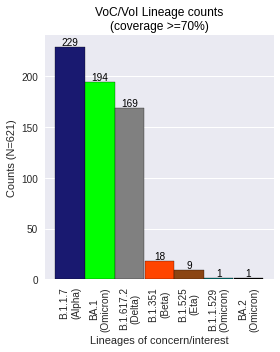

In [39]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(4,5))
y = df_voc_grp_lin

n = sum(y)
g = plt.bar(y.index, y, color=[c[1] for c in clr_code.values()], width=0.99, ec='k')
ax.bar_label(g, label_type='edge', labels=list(y), color='k', fontsize=10)
ax.set_xticklabels([d.replace('(', '\n(') for d in df_voc_grp_lin.to_frame().index])
# xticks=ax.get_xticks()
# xlabels=['B.1.1.7\n(Alpha)', 'B.1.617.2\n(Delta)', 'B.1.351\n(Beta)', 'B.1.525\n(Eta)']#[label.get_text().replace("(", "\n(") for label in list(ax.get_xticklabels())]
plt.ylabel(f'Counts (N={n})')
plt.xlabel('Lineages of concern/interest')
# plt.grid('major', axis='y', ls='-.')
plt.title('VoC/VoI Lineage counts\n(coverage >=70%)', title_fontdict)
# plt.xticks(xticks, labels=xlabels)
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.tight_layout()
## plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-VoI-VoC{category+'_'}{dt}.{ext}")
plt.show()
#doesn't seem like a good plot, consider pie chart

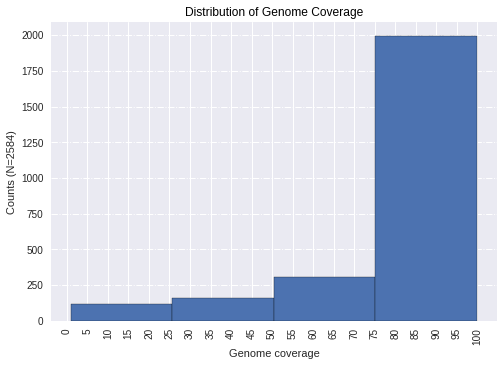

In [40]:
fig,ax = plt.subplots(1,1)
plt.hist(df_seq_summ_who['G_COV'], bins=4, ec='k')
plt.xlabel('Genome coverage')
plt.ylabel(f'Counts (N={df_seq_summ_who.shape[0]-1})')
plt.xticks(np.arange(0,105, 5), rotation=90)
# plt.yticks(np.arange(0,375, 25))
plt.grid('major', axis='y', ls='-.')
plt.title('Distribution of Genome Coverage', title_fontdict)
# ax.hlines(67, 2, 99, colors='orange', linestyles='--')
# plt.annotate('80% coverage threshold', xy=(30, 80))
# fig.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-coverage-dist{category+'_'}{dt}.{ext}")
plt.show()



In [41]:
df_gby_lin = df_seq_summ70.groupby('LIN').count()#, as_index=False

In [42]:
clr_code_keys = list(clr_code.keys())

In [43]:
lins = df_gby_lin.S_NUM.sort_values(ascending=False)#.index
# lins

In [ ]:
lin_to_be_assinged =  set(lins.index) - set(clr_code_keys)
# lin_to_be_assinged

In [45]:
max_count = lins.max()
# max_count

In [46]:
dt_lins = df_seq_summ_ke[df_seq_summ_ke['G_COV'] >= 70.0].assign(LIN=df_seq_summ_ke.LIN.replace('B.1.617.2', 'B.1.617.2(Delta)').
                                       apply(lambda x: str(x).replace(str(x), x+'(Delta)') if 'AY' in str(x) else x))
deltas = ['AY.16(Delta)',
 'AY.33(Delta)',
 'B.1.617.2(Delta)',
 'AY.24(Delta)',
 'AY.7.1(Delta)',
 'AY.26(Delta)',
 'AY.4(Delta)',
 'AY.34(Delta)',
 'AY.37(Delta)']
df_delta = dt_lins[dt_lins.LIN.str.contains('Delta') == True]
delta_counts = df_delta.LIN.value_counts().to_frame().reset_index()

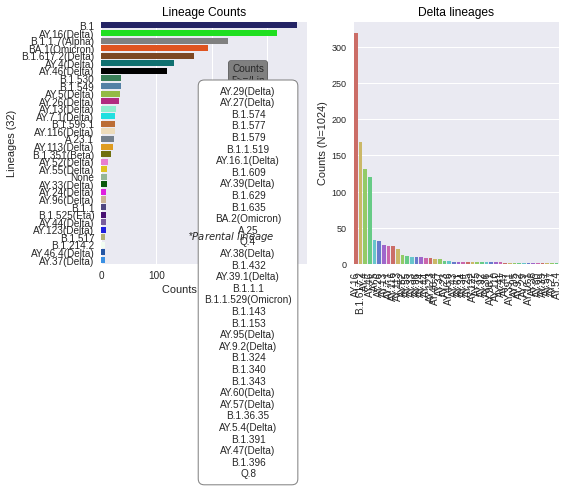

In [48]:
plt.style.use('seaborn')
width = lins.sort_values(ascending=True)
data = lins.to_frame().reset_index()
delta_counts = df_delta.LIN.value_counts().to_frame().reset_index()#.rename(columns={'index': 'LIN'})

# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
colors = [clr[1] for lin,clr in zip(width.index, clr_code.values())]
color_sns = {lin: clr[1] for lin,clr in zip(width.index, clr_code.values())}

if category == 'drc': n = 'Deltas'

xticks = np.arange(0, (math.ceil(max_count / 5) + 1) * 5, 10)
fig, ax =plt.subplots(1, 2, figsize=(8,6), gridspec_kw={'width_ratios': [1, 1]})
labels = data[data['S_NUM'] == 1]['LIN'].tolist()
# ax.set_facecolor("#E5E4E2")##E5E4E2

# plt.barh(width.index, width, height=0.7, log=False, color=colors)#, logy=True
# sns.color_palette('bright')
count_cut_off = 5
sns.barplot(x='S_NUM', y='LIN', data=data[data['S_NUM'] > count_cut_off], palette=colors, ax=ax[0])
sns.barplot(x='index', y='LIN', data=delta_counts, ax=ax[1], palette=sns.color_palette('hls', 8))

m = data[data['S_NUM'] > count_cut_off].S_NUM.sum()
mm = data.LIN.sum()

n = data[data['S_NUM'] > count_cut_off].LIN.nunique()
nn= delta_counts.LIN.sum()

# plt.xticks(xticks, xticks, rotation=90)
plt.yticks(fontsize=9)# plt.yticks(width.index, fontsize=7)
# plt.grid(which='major', axis='x', ls='--', color='w')
ax[0].set_ylabel(f'Lineages ({n})')
ax[0].set_xlabel(f'Counts (N={m})')
ax[0].set_title('Lineage Counts', title_fontdict)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
new_line = '\n'
x = '*'
if count_cut_off > 1: 
    eq = '>='
else: eq = ''
ax[0].text(
    0.75*data.S_NUM.max(),0.25*n - 0.25*0.5, f'Counts{new_line}{count_cut_off}{eq}/Lin', ha='center', va='bottom', rotation=0,# size=15,
    bbox=dict(boxstyle="round,pad=0.3", ec=None, fc="grey"))
ax[0].text(
    0.75*data.S_NUM.max(),0.25*n, f"{f'{new_line}'.join(labels)}", ha='center', va='top', rotation=0,# size=15,
    bbox=dict(boxstyle="round,pad=0.6", fc="w", ec="grey", lw=1))
# ax[0].annotate(f"{f'Count=1{new_line}'+f'{new_line}'.join(labels)}", (0,0), xycoords='axes fraction',
#             xytext=(0.74, 0.05))
ax[0].annotate(f"{x}$Parental$ $lineage$", (0,0), xycoords='axes fraction',
            xytext=(0.42, 0.1))
ax[1].set_ylabel(f'Counts (N={nn})')
ax[1].set_xlabel(f'')
ax[1].set_xticklabels([d.split('(')[0] for d in delta_counts['index']], rotation=90)
ax[1].set_title('Delta lineages', title_fontdict)
# fig.suptitle('Lineage Counts')
plt.tight_layout()
## fig.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-lineages{category+'_'}{dt}.{ext}")
plt.show()
#include a subplot of deltas only

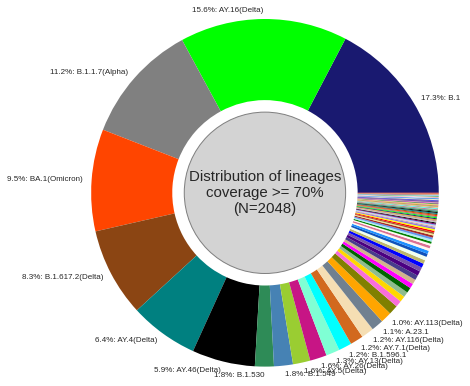

In [98]:
fig,ax = plt.subplots()

data = df_seq_summ70['LIN'].value_counts()
pie_clr = {clr[1]: lin for lin,clr in zip(data.index, clr_code.values())}
pct = (np.array(data)/np.array(data).sum()*100).round(1)
labels = {}
for k,v in zip(data.index, pct):
    if v >= 1:
        labels[k] = f'{v}%: {k}'
    else:
        labels[k] = ''
plt.pie(data, wedgeprops=dict(width=0.7), labels=list(labels.values()), labeldistance=1.05, radius=1.5, 
       colors=pie_clr, textprops={'fontsize':8}, rotatelabels=False)
t = ax.text(
    0, 0, f'Distribution of lineages\ncoverage >= 70%\n(N={data.sum()})', ha="center", va="center", size=15,
    bbox=dict(boxstyle="circle,pad=0.3", fc="lightgray", ec="gray", lw=1))
# ax.annotate(f'Distribution of lineages\nN={data.sum()}\n(coverage >= 70%)', (0,0), fontsize=14)
# ax.set_title('Proportions for Test Outcome', title_fontdict, pad=1.1)
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linfreq-pie{category+'_'}{dt}.{ext}")
plt.show()

In [50]:
top10lins = df_seq_summ70['LIN'].value_counts().index[:10].tolist()#.head()
top10lins

['B.1',
 'AY.16(Delta)',
 'B.1.1.7(Alpha)',
 'BA.1(Omicron)',
 'B.1.617.2(Delta)',
 'AY.4(Delta)',
 'AY.46(Delta)',
 'B.1.530',
 'B.1.549',
 'AY.5(Delta)']

In [51]:
df = df_seq_summ70[df_seq_summ70['DT_SAM_COLL'].notna()]
df.shape
df[df['LIN'].isin(top10lins)].shape

(1472, 43)

In [52]:
df_timeidx = df_seq_summ70[df_seq_summ70['DT_SAM_COLL'].notna()]
df_timeidx.shape
df_timeidx[df_timeidx['LIN'].isin(top10lins)].shape

(1472, 43)

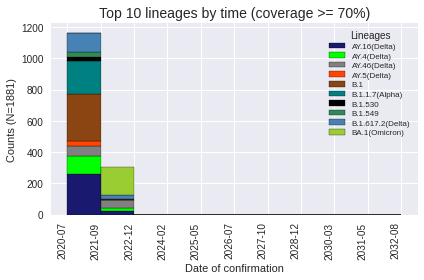

In [53]:
plt.style.use('seaborn')
# Prepare data
df = df_seq_summ70[df_seq_summ70['DT_SAM_COLL'].notna()]

x_var = 'DT_SAM_COLL'
groupby_var = 'LIN'
df_agg = df[df['LIN'].isin(top10lins)].loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

lineages = [i for i, df_seq_summ10Cs in df_agg]
colors = {l: c[1] for c, l in zip(clr_code.values(), lineages)}
# Draw
plt.figure(figsize=(6,4))
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, len(df_agg[x_var].unique()), stacked=True, density=False, color=colors.values(), ec='k')

# Decoration
plt.legend(colors, title='Lineages', fancybox=True, labelspacing=0.25, ncol=1, fontsize=8)#, ncol=3
plt.title(f"Top 10 lineages by time (coverage >= 70%)", fontsize=14)
plt.xlabel('Date of confirmation')
plt.ylabel(f"Counts (N={df.shape[0]})")
# plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=pd.to_datetime(bins).strftime('%Y-%m'), rotation=90, horizontalalignment='right')
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linXtime{category+'_'}{dt}.{ext}")
plt.show()

In [54]:
width = df_covs['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

In [55]:
top10counties = df_seq_summ70.COUNT_RES.value_counts()[:10].index.tolist()
# top10counties

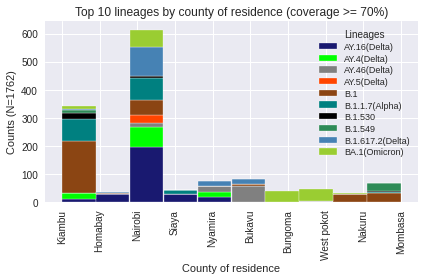

In [56]:
plt.style.use('seaborn')
# Prepare data
df_seq_summ10Cs = df_seq_summ70[df_seq_summ70.COUNT_RES.isin(top10counties)]

x_var = 'COUNT_RES'
groupby_var = 'LIN'
df_agg = df_seq_summ10Cs[df_seq_summ10Cs['LIN'].isin(top10lins)].loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_seq_summ10Cs[x_var].values.tolist() for i, df_seq_summ10Cs in df_agg]

lineages = [i for i, df_seq_summ10Cs in df_agg]
colors = {l: c[1] for c, l in zip(clr_code.values(), lineages)}
# Draw
plt.figure(figsize=(6,4))
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, len(df_agg[x_var].unique()), stacked=True,
                            density=False, color=colors.values(), ec='w', rwidth=0.99)

# Decoration
plt.legend(colors, title='Lineages', fancybox=True, labelspacing=0.3, ncol=1, fontsize=9)#, ncol=3,
plt.title(f"Top 10 lineages by county of residence (coverage >= 70%)", fontsize=12)
plt.xlabel('County of residence')
plt.ylabel(f"Counts (N={df_seq_summ10Cs.shape[0]})")
# plt.ylim(0, 40)
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linXtime{category+'_'}{dt}.{ext}")
plt.show()

In [57]:
df_seq_summ10Ls = df_seq_summ10Cs[df_seq_summ10Cs.LIN.isin(top10lins)]

In [58]:
row_order = df_seq_summ10Ls.groupby('COUNT_RES').count().S_NUM.sort_values(ascending=False)
# row_orderpalette

In [59]:
df_seq_summ10Ls_ord = df_seq_summ10Ls.assign(COUNT_RES = pd.Categorical(df_seq_summ10Ls.COUNT_RES, categories=row_order.index,ordered=True))

In [60]:
sr_top10lin = df_seq_summ70['LIN'].value_counts()[:10]
top10lin_rev = sr_top10lin.sort_values(ascending=True).index

In [61]:
# sr_top10lin

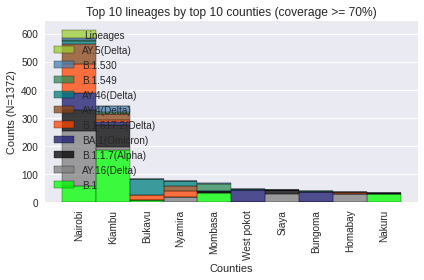

In [62]:
df_seq_summ10Ls_srt = df_seq_summ10Ls_ord.rename(columns={'LIN':'Lineages'}).sort_values('COUNT_RES', ascending=False)
fig,ax = plt.subplots(figsize=(6,4))
# sns.set_palette(sns.color_palette(colors.values()))
palette_clr = {l: c[1] for l,c in zip(df_seq_summ10Ls_srt.Lineages.unique(), clr_code.values())}
# sns.set_color_codes('pastel')
sns.histplot(df_seq_summ10Ls_srt, x='COUNT_RES', 
            hue='Lineages',multiple="stack",
             hue_order=top10lin_rev,
#             stat='percent',
#             col_order=row_order,
           palette=palette_clr, legend=True)#legend=True, loc='upper right',title='Lineages', ncol=1, borderaxespad=0
# ax.get_legend()
plt.xticks(rotation=90)
plt.ylabel(f'Counts (N={row_order.sum()})')
plt.xlabel('Counties')
# plt.legend(palette_clr, title='Lineages', fancybox=True, labelspacing=0.25, ncol=1)
# plt.legend(df_seq_summ10Ls_srt.LIN.value_counts().sort_values(ascending=True)[-10:].index,
#           title='Lineages', ncol=1)#, bbox_to_anchor=(1,1)
plt.title('Top 10 lineages by top 10 counties (coverage >= 70%)', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
## plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linXcounty{category+'_'}{dt}.{ext}")
plt.show()

In [63]:
legend = ax.get_legend(); handles = legend.legendHandles

In [64]:
df_time10 = df_seq_summ70[df_seq_summ70['DT_SAM_COLL'].notna()]#.set_index('DT_CONF').sort_index()

In [65]:
df_timeidx = df_time10[df_time10['LIN'].isin(top10lins)].set_index('DT_SAM_COLL').sort_index().drop_duplicates()

In [66]:
# df_timeidx.to_excel('/home/douso/Downloads/df_timeidx2.xlsx')#.head(5)#.LIN

In [67]:
df_timeidx.shape#.head()#to_excel('/home/douso/see.xlsx')#.

(1472, 42)

In [68]:
df_ts = df_timeidx[df_timeidx['LIN'].notna()]
df_ts.shape

(1472, 42)

In [69]:
df_ts2 = df_ts[df_ts['LIN'].isin(top10lins)]
df_ts2.shape

(1472, 42)

In [70]:
df_ts3 = df_ts2.assign(LIN = pd.Categorical(df_ts2.LIN, categories=top10lins,ordered=True))

In [71]:
# df_ts3.head()

In [72]:
fortnightly = df_ts3.resample('2W', closed='right')#['lineage'].value_counts()

In [73]:
x = fortnightly['LIN'].value_counts()#.to_frame()#.T#.plot.hist(stacked=True)

In [74]:
x_index = x.index
x_counts = list(x)

In [75]:
dict_={}
for idx,lin in zip(x_index, x_counts):
    if idx[0] in dict_:
        dict_[idx[0]][idx[1]] = lin
    else:
        dict_[idx[0]] = {}
        dict_[idx[0]][idx[1]] = lin

In [76]:
dt_lin_ts = pd.DataFrame(columns=set(x.index.get_level_values(1)))
# data = {l: 0 for l in set(x.index.get_level_values(1))}
idx = []
for k,v in dict_.items():
    data = {l: 0 for l in set(x.index.get_level_values(1))}
    data.update(v)
    dt_lin_ts = dt_lin_ts.append(data, ignore_index=True)
    idx.append(k)#.strftime('%Y-%m-%d'))
dt_lin_ts.index=idx
# dt_lin_ts

In [77]:
# plt.style.available
lin_colors = [v[1] for v in clr_code.values()]

In [78]:
dt_lin_ts1 = dt_lin_ts[top10lins]

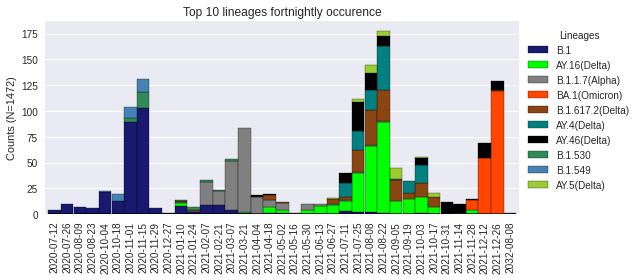

In [79]:
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
# plt.style.use('ggplot')
xticks = list(map(lambda x: pd.Timestamp(x), list(dt_lin_ts.index)))
xlabels = list(map(lambda x: x.strftime('%Y-%m-%d'), list(dt_lin_ts.index)))
fig,ax = plt.subplots(figsize=(9,4))
dt_lin_ts1.plot.bar(stacked=True, ax=ax, color=lin_colors, ec='k', width=0.99)#, subplots=True
ax.set_xticklabels(xlabels)
plt.xticks()
plt.ylabel(f"Counts (N={df_ts2.shape[0]})")
plt.legend(title='Lineages', bbox_to_anchor=(1, 1), fancybox=True, ncol=1)#bbox_to_anchor = (1, 1), 
plt.title('Top 10 lineages fortnightly occurence')
plt.grid(axis='x')
plt.tight_layout()
## plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linX2weeks{category+'_'}{dt}.{ext}")
plt.show()

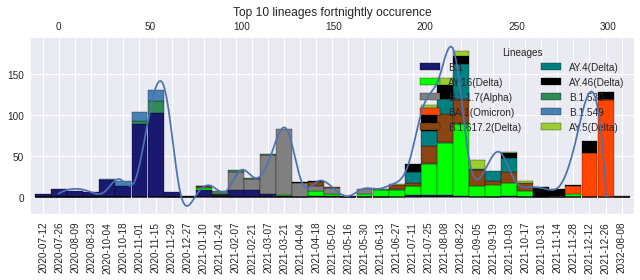

In [80]:
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
# plt.style.use('ggplot')
xticks = list(map(lambda x: pd.Timestamp(x), list(dt_lin_ts.index)))
xlabels = list(map(lambda x: x.strftime('%Y-%m-%d'), list(dt_lin_ts.index)))
fig,ax = plt.subplots(figsize=(9,4))
                               
#Get x boundaries
start = pd.Timestamp(dt_lin_ts1.index[0])
end = pd.Timestamp(dt_lin_ts1.index[-1])

#X-locators
dt_rng = pd.date_range(start, end, periods=dt_lin_ts1.shape[0], normalize=True)
                
y=dt_lin_ts1.sum(axis=1)
x_interp = np.linspace(start.value, end.value, len(y))   
                               
#Train model
#         cubic_interploation_model = interp1d(x_interp, y, kind = "cubic")
bspline_interp = make_interp_spline(x_interp, y, k=3)

# Plotting the Graph
X_=np.linspace(x_interp.min(), x_interp.max(), 300)
#         Y_=cubic_interploation_model(X_)
Y_=bspline_interp(X_)

                               
dt_lin_ts1.plot.bar(stacked=True, ax=ax, color=lin_colors, ec='k', width=0.99)#, subplots=True
ax.set_xticklabels(xlabels)
ax2 = ax.twiny()
ax2.plot(Y_)

plt.xticks()
plt.ylabel(f"Counts (N={df_ts2.shape[0]})")
ax.legend(title='Lineages', bbox_to_anchor=(1, 1), fancybox=True, ncol=2, loc=1)#bbox_to_anchor = (1, 1), 
plt.title('Top 10 lineages fortnightly occurence')
plt.grid(axis='x')
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linX2weeks+Trend{category+'_'}{dt}.{ext}")
plt.show()

In [81]:
import numpy as np
from scipy.interpolate import interp1d, make_interp_spline
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive


lin_colors = [v[0] for v in clr_code.values()]

topX = list(top10lins) + ['All']
lineage = widgets.Dropdown(options=topX, value='All', description='Lineages:')
interp_points = widgets.IntSlider(value=500, min=100, max=2100, step=500, description='Number of data points:')
 
def graph1(lineage, interp_points):
    # Dataset
    df_graph = dt_lin_ts
    n = df_graph.shape[0]
    
    #Get x boundaries
    start = pd.Timestamp(df_graph.index[0])
    end = pd.Timestamp(df_graph.index[-1])
    
    #X-locators
    dt_rng = pd.date_range(start, end, periods=n, normalize=True)
    xticks = [pd.Timestamp(dt).value for dt in dt_rng]#dt_lin_ts.index
    xlabel = [dt.strftime('%Y-%m') for dt in dt_rng]#dt_lin_ts.index
    
    #Plot canvas
    fig,ax = plt.subplots(figsize=(6,4))
    
    if lineage == 'All':
        lins = df_graph.columns
    else:
        lins = []; lins.append(lineage)
    for lin in lins:
#         df_graph += 1
        y=df_graph[lin]
        x_interp = np.linspace(start.value, end.value, len(y))
    
        #Train model
#         cubic_interploation_model = interp1d(x_interp, y, kind = "cubic")
        bspline_interp = make_interp_spline(x_interp, y, k=3)
 
        # Plotting the Graph
        X_=np.linspace(x_interp.min(), x_interp.max(), interp_points)
#         Y_=cubic_interploation_model(X_)
        Y_=bspline_interp(X_)

        ax.plot(X_, Y_, label=lin)#, color=lin_colors)
        ax.legend()
    plt.title('Lineages count over time')
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_minor_locator(MultipleLocator(4))
    plt.xticks(xticks, labels=xlabel, rotation=90)
    plt.xlabel("Months (fortnightly)")
    plt.ylabel("Counts")
    plt.show()

In [82]:
interactive(graph1, lineage=lineage, interp_points=interp_points)

interactive(children=(Dropdown(description='Lineages:', index=10, options=('B.1', 'AY.16(Delta)', 'B.1.1.7(Alp…

In [83]:
from ipywidgets import widgets, interactive

In [84]:
index = df_ts['LIN'].resample('M', closed='right').count().index

In [85]:
ticks = [dt.value for dt in index]

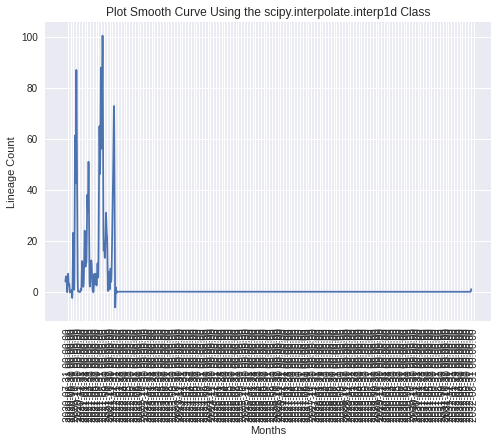

In [86]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
n=df_ts.shape[0]
x=np.arange(n)
y=np.array(df_ts['LIN'].resample('W', closed='right').count())

start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

t = np.linspace(start.value, end.value, len(y))

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)

fig,ax = plt.subplots()

plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_minor_locator(MultipleLocator(4))
plt.xticks(ticks, labels=index, rotation=90)
plt.xlabel("Months")
plt.ylabel("Lineage Count")
plt.show()

In [87]:
start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

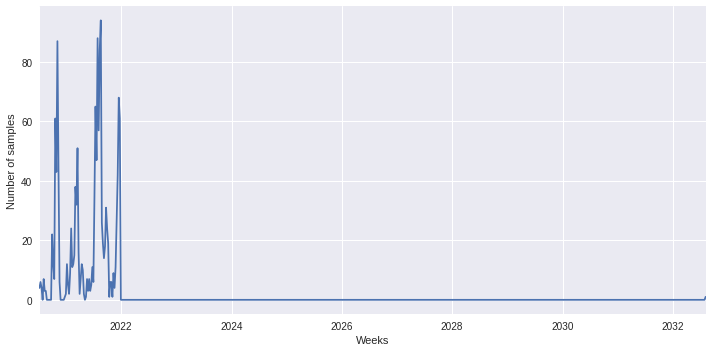

In [88]:
import numpy as np
from scipy.interpolate import interp1d

fig, ax = plt.subplots(figsize=(10, 5))

tests = df_ts['LIN'].resample('W').count()
# pos = df_tseries0['RESULT'].resample('W').count()
# neg = df_tseries1['RESULT'].resample('W').count()

tests.plot(ax=ax, linestyle='-', label='tests')
# neg.plot(ax=ax, marker='o', linestyle='-', label='negaives')
# pos.plot(ax=ax, marker='o', linestyle='-', label='positives')

plt.xlabel('Weeks')
plt.ylabel('Number of samples')
# plt.legend()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-line_{dt}.{ext}')
plt.show()

In [89]:
df_B = pd.DataFrame({'Finland': 1, 'Fiji': 1, 'Australia': 2, 'Sweden': 11, 'United States of America':16, 'Kenya':35}, index=['B.1.596.1'])

In [90]:
df_B

,Finland,Fiji,Australia,Sweden,United States of America,Kenya
B.1.596.1,1,1,2,11,16,35


In [91]:
dict_ = {'Finland': 1, 'Australia': 2, 'Sweden': 11, 'United States of America':16, 'Kenya':35}

<BarContainer object of 5 artists>

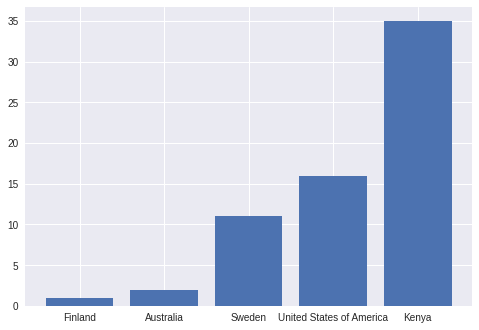

In [92]:
plt.bar(dict_.keys(), dict_.values())#df_B.T, df_B.T['B.1.596.1'].values())#x=df_B.loc[:], y=df_B.columns, data=df_B)

Text(0, 0.5, 'B.1.596.1\nCounts')

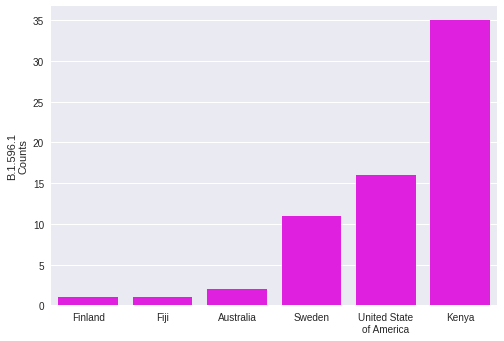

In [93]:
fig,ax = plt.subplots()
p = sns.barplot(x=df_B.T.index, 
            y=df_B.T['B.1.596.1'], data=df_B.T, color='#FF00FF', ax=ax)
ax.set_xticklabels([d.replace('s ', '\n') for d in df_B.T.index])
# plot.text(range(4), 'test', ha='center')
plt.ylabel('B.1.596.1\nCounts')
## plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-B.1.596.1{category+'_'}{dt}.{ext}")
